In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size

In [ ]:
# random generator
rng = np.random.default_rng()

# legacy random generator
# rng = np.random.RandomState(1234)

## Brownian Motion

\begin{equation*}
B(t + \Delta t) = B(t) + \sqrt{\Delta t} \cdot \epsilon
\end{equation*}

where $\epsilon$ is a random variable with a normal distribution.

\begin{equation*}
\epsilon \sim N(0, 1)
\end{equation*}

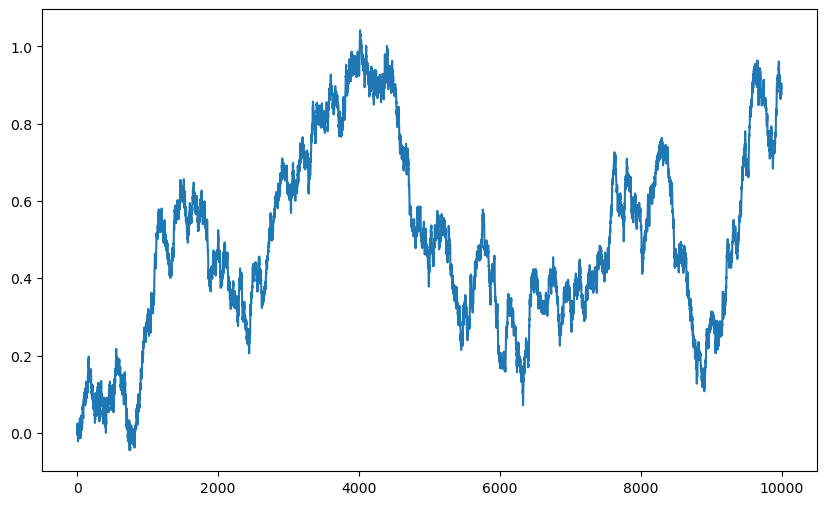

In [3]:
T = 1 # time horizon
n = 10000 # number of steps
dt = T / n # time step

B = np.zeros(n + 1)
for i in range(n):
    B[i + 1] = B[i] + rng.standard_normal() * np.sqrt(dt)
    
# Alternative, vectorized version
B[1:] = np.cumsum(rng.standard_normal(n) * np.sqrt(dt))

plt.plot(B)
plt.show()

## Geometric Brownian Motion

\begin{equation*}
S(t + \Delta t) = S(t) \cdot e^{(\mu - \frac{\sigma^2}{2}) \Delta t + \sigma \sqrt{\Delta t} \cdot \epsilon}
\end{equation*}

where $\epsilon$ is a random variable with a normal distribution.

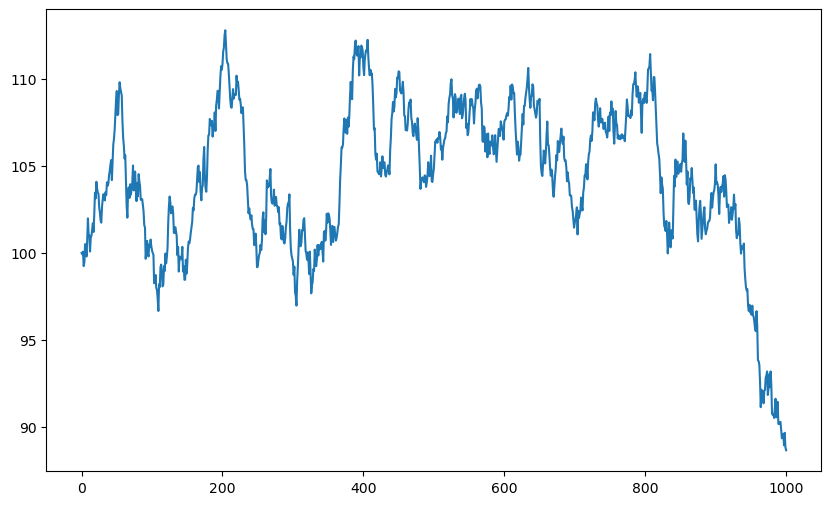

In [12]:
S0 = 100 # initial value
mu = 0.05 # drift
sigma = 0.2 # volatility
T = 1 # time horizon
n = 1000 # number of steps
dt = T / n # time step

S = np.zeros(n + 1)
S[0] = S0
for i in range(n):
    S[i + 1] = S[i] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * rng.standard_normal() * np.sqrt(dt))
    
# Alternative, vectorized version
S[1:] = S[0] * np.cumprod(np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * rng.standard_normal(n) * np.sqrt(dt)))

plt.plot(S)
plt.show()